# Peak width vs mass

In [1]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/Feb 09/echowidth_glycerin_sample_size/2_743")

In [85]:
def fit_echo(fname, avg_start, avg_stop, guess = [4, .02,.0008, .5]):
    FIDData = pd.read_csv(rel_path / fname, header = None)

    chan1 = FIDData[1].values
    chan2 = FIDData[2].values
    tlist = FIDData[0].values

    plt.plot(tlist, chan1)
    plt.plot(tlist, chan2)

    avg_window = slice(avg_start, avg_stop)

    plt.axvspan(min(tlist[avg_window]), max(tlist[avg_window]), color = "tab:red", alpha = .5)

    plt.show()

    chan1 = np.subtract(chan1, np.mean(chan1[avg_window]))
    chan2 = np.subtract(chan2, np.mean(chan2[avg_window]))

    trans_mag = np.sqrt(np.square(chan1) + np.square(chan2))
    stdev = max(trans_mag[avg_window]) - min(trans_mag[avg_window])

    def gaussian_fit(t, A, mu, T2, c):
        return A*np.exp(-(t-mu)**2/(2*T2**2)-t/c)

    popt, pcov = curve_fit(gaussian_fit, tlist, trans_mag, p0 = guess, sigma = [stdev for y in tlist])

    plt.plot(tlist,trans_mag, color = "r", alpha = .5, label = "Data")
    plt.plot(tlist, [gaussian_fit(t, *popt) for t in tlist], label = r"$e^{-(t-2\tau)^2/(2T_2^\ast)^2}$", color = "b")
    plt.xlabel(r"$t$ (s)", fontsize = 16)
    plt.ylabel(r"$M_{xy}$ (V)", fontsize = 16)
    plt.gcf().set_dpi(200)
    plt.legend()
    plt.show()
    print(pcov[2])
    return popt[2], np.sqrt(pcov[2][2])

In [86]:
T2s = []
errs = []

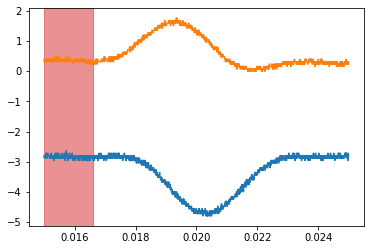

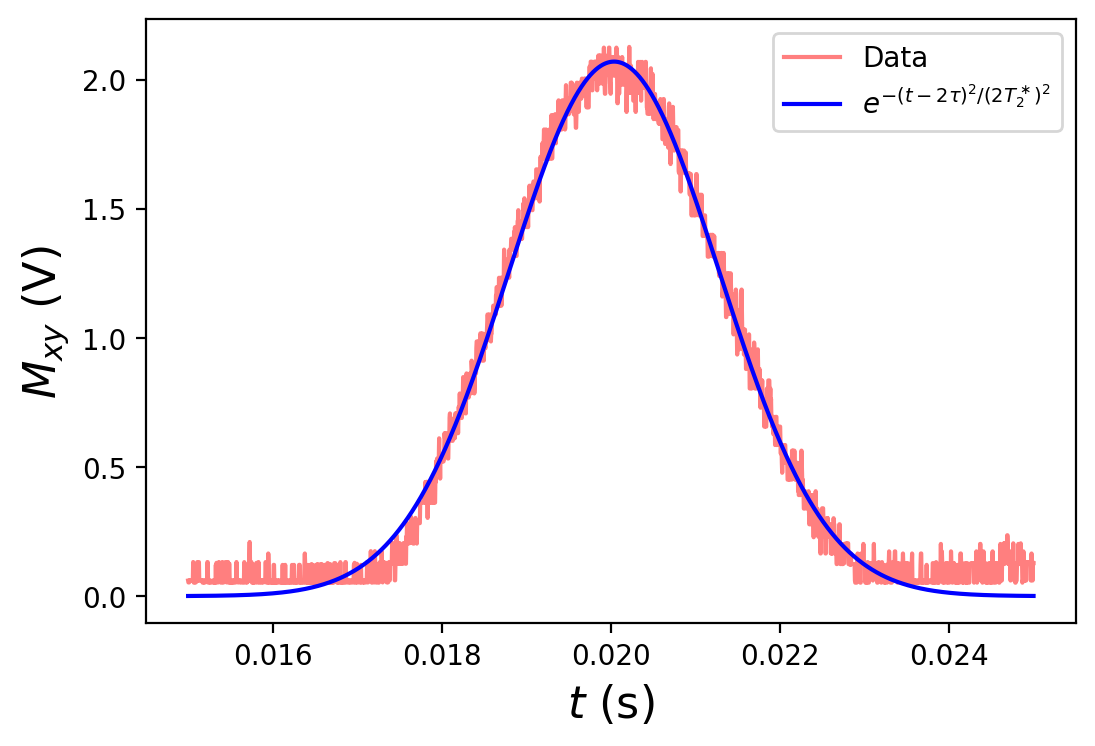

[-3.97488914e-06 -1.48165638e-10  5.88270924e-12  9.31237553e-01]


In [88]:
T2, err = fit_echo("0_29.csv", 0, 400)
T2s.append(T2)
errs.append(err)

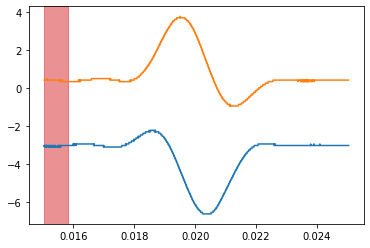

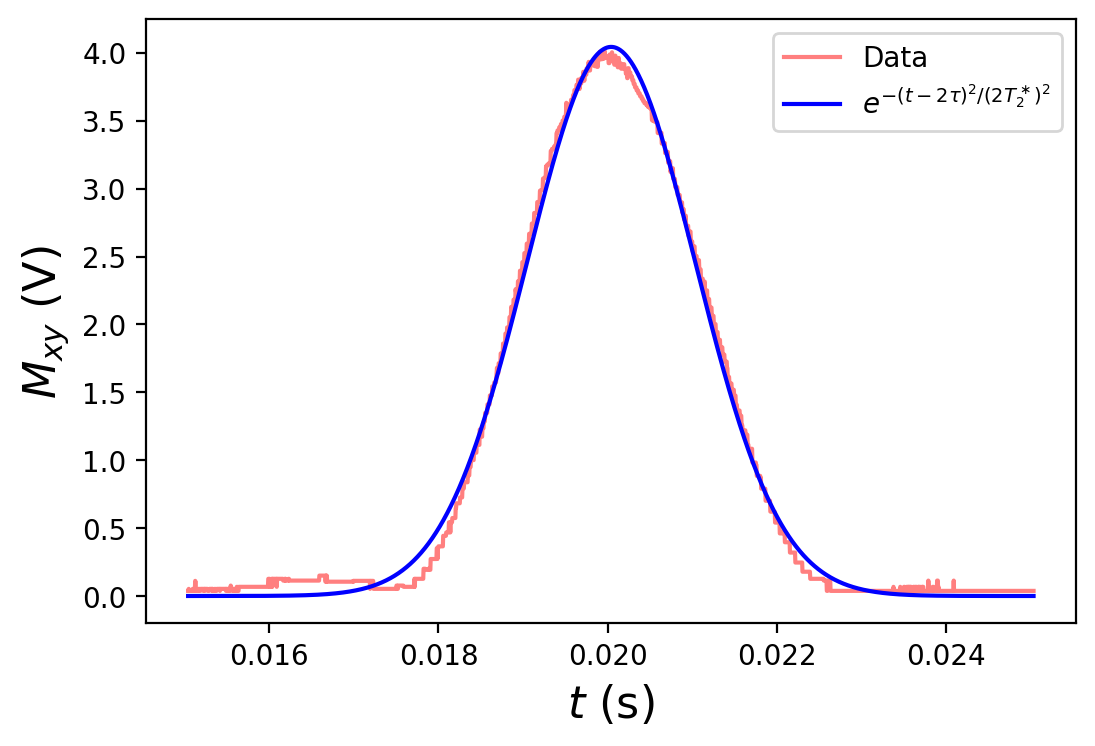

[-6.24873391e-04 -7.50426956e-09  1.75543091e-12  7.11816652e-03]


In [89]:
T2, err = fit_echo("0_57.csv", 0, 200)

T2s.append(T2)
errs.append(err)

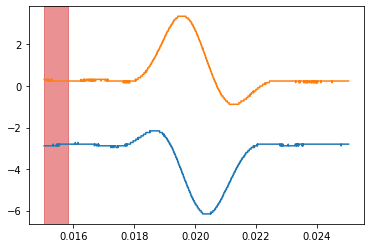

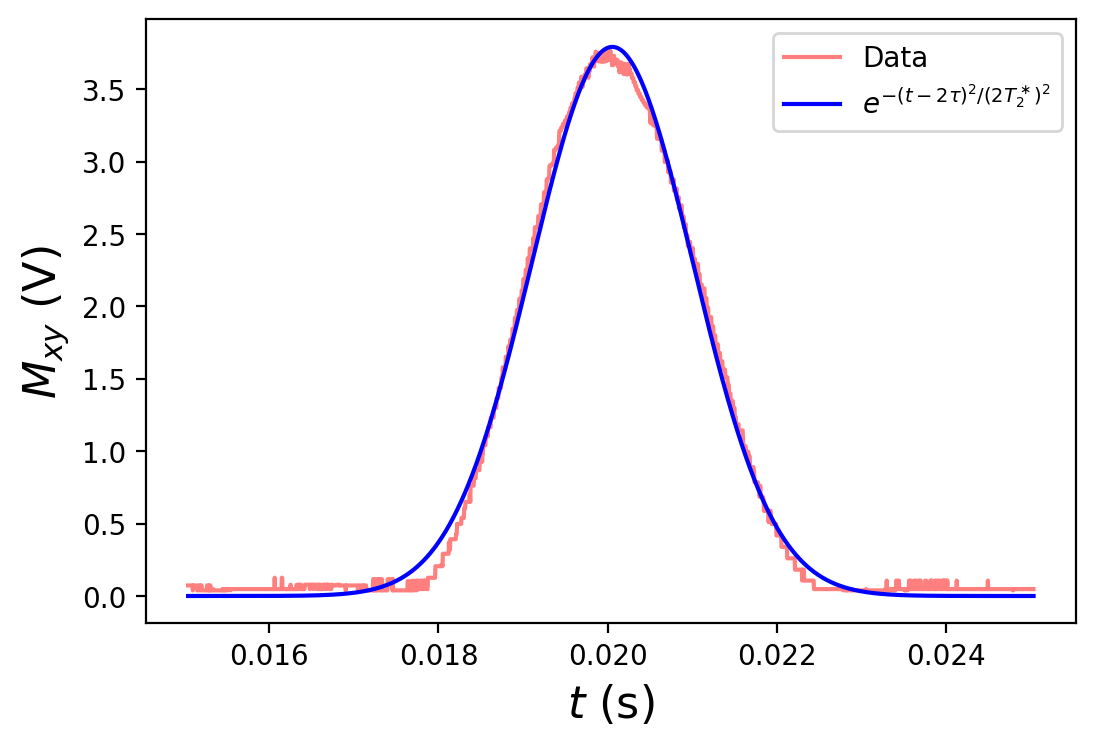

[-2.21720827e-03 -2.52188934e-08  1.66121798e-12  4.64062622e-03]


In [90]:
T2, err = fit_echo("0_83.csv", 0, 200)

T2s.append(T2)
errs.append(err)

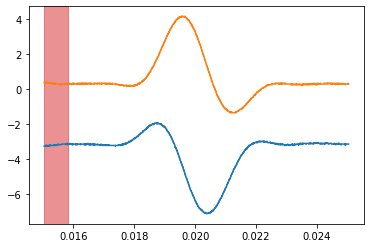

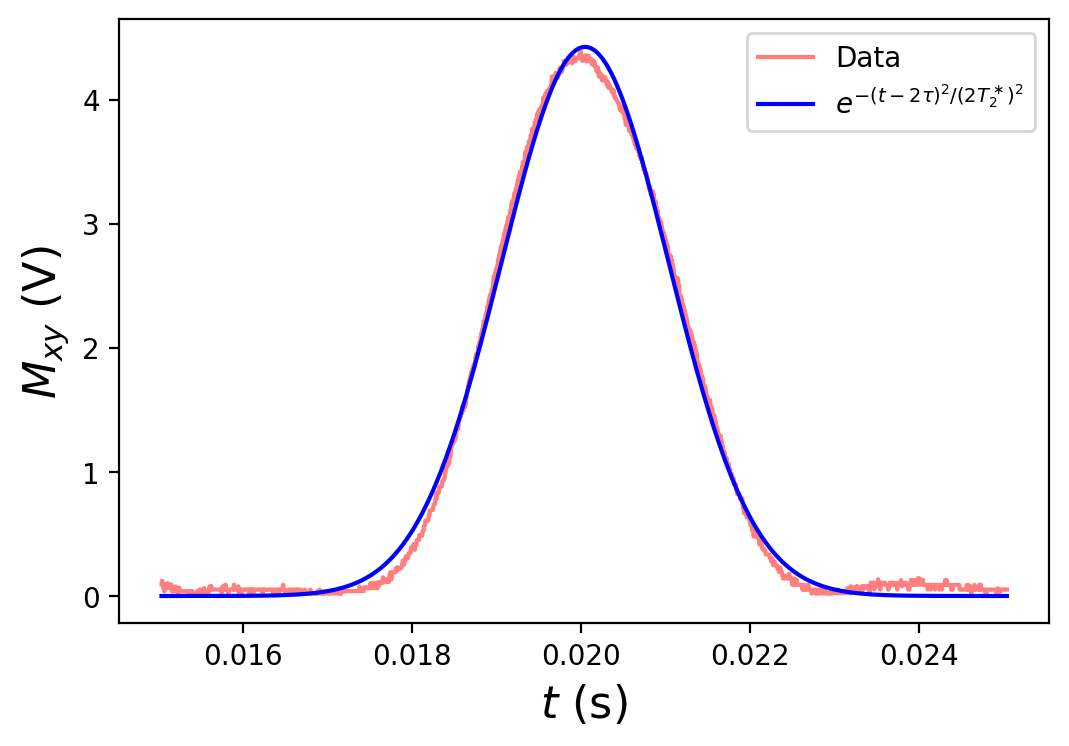

[ 3.14047411e-04  3.42572122e-09  1.51971064e-12 -9.75471514e-03]


In [91]:
T2, err = fit_echo("1_01.csv", 0, 200)
T2s.append(T2)
errs.append(err)

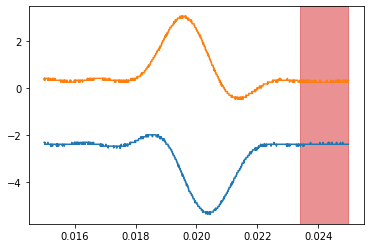

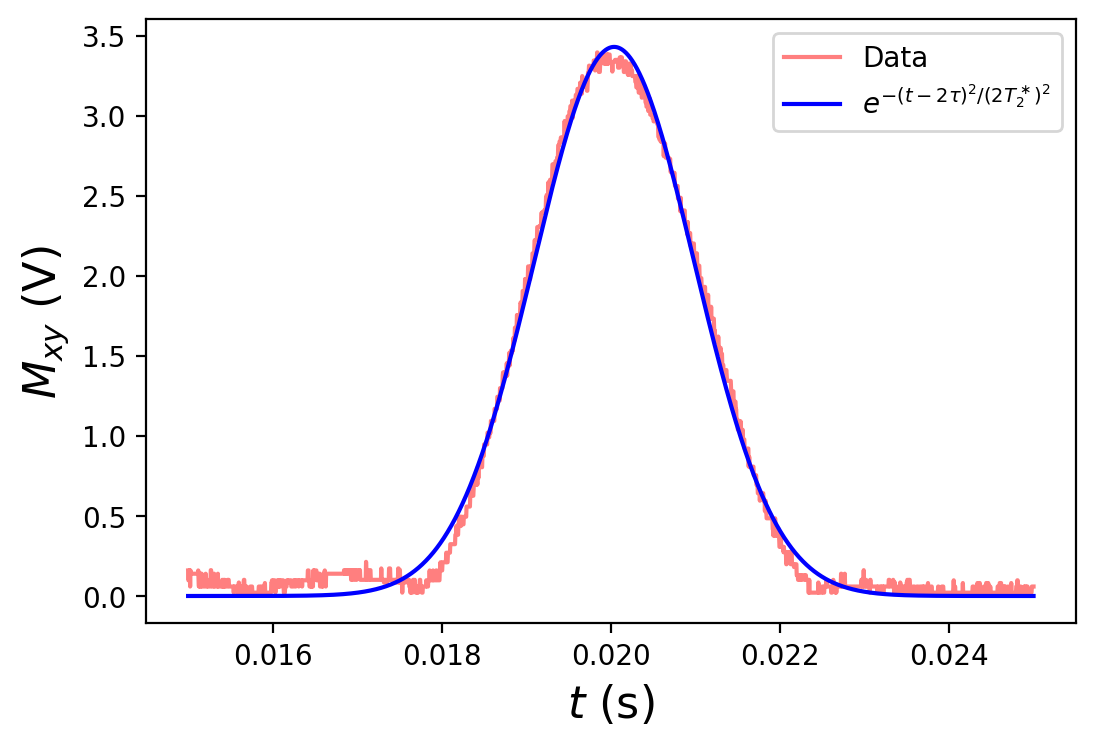

[-1.15302035e-03 -1.43806061e-08  2.19853787e-12  2.51435627e-03]


In [92]:
T2, err = fit_echo("1_27.csv", 2100, -1)

T2s.append(T2)
errs.append(err)

In [93]:
T2s

[0.0012443971952640295,
 0.0012443971952640295,
 0.0009967888318538087,
 0.0009532641790058274,
 0.0009898978068912819,
 0.0009496515658209635]

In [94]:
def invfit(x, a, b):
    return a/x+b

In [95]:
popt, pcov = curve_fit(invfit,[.29, .57, .83, 1.01, 1.27], T2s, p0 = [.0003, .0008])

ValueError: operands could not be broadcast together with shapes (5,) (6,) 

In [34]:
(T2s[-1]-T2s[0])/(1.27-.29)

-0.0003007611880466329

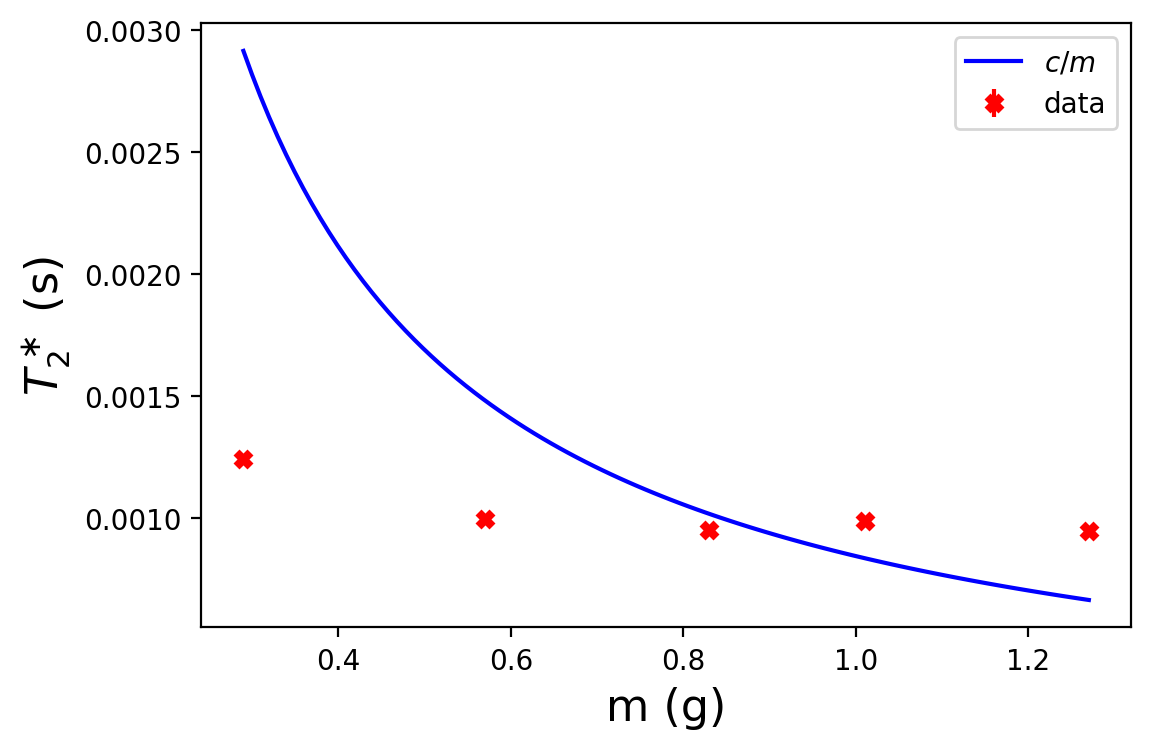

In [35]:
plt.errorbar([.29,.57,.83,1.01,1.27], T2s, yerr = errs, linestyle = "None", color = "r", marker = "X", label = "data")
xlist = np.linspace(.29,1.27, 100)
#plt.plot(xlist, [invfit(x, *popt) for x in xlist], label = r"$c/m + b$")
plt.plot(xlist, [invfit(x, popt[1],0) for x in xlist], label = r"$c/m$", color = "b")
plt.xlabel("m (g)", fontsize = 16)
plt.ylabel(r"$T_2^\ast$ (s)", fontsize = 16)
plt.legend()
plt.gcf().set_dpi(200)

In [36]:
T2s

[0.0012443972325110809,
 0.000996790262252001,
 0.0009532639754333467,
 0.0009898987816005002,
 0.0009496512682253806]

In [60]:
FID_path = Path("/home/ben/Documents/Repos/382L_NMRLab/data/Feb 09/glycerin_FID")

T2s_FID = []

In [78]:
data = pd.read_csv(FID_path / "1_27.csv", header = None)

thresh = 1
chan_1_cut = np.argwhere([a > thresh for a in np.diff(data[1].values)])[0][0]
chan_2_cut = np.argwhere([a > thresh for a in np.diff(data[1].values)])[0][0]
ad_chan1 = np.mean(data[1].values[:chan_1_cut-50])
ad_chan2 = np.mean(data[2].values[:chan_2_cut-50])

tlist = data[0].values
chan1 = data[1].values - ad_chan1
chan2 = data[2].values - ad_chan2

trans_mag = np.sqrt(np.square(chan1)+np.square(chan2))[max([chan_1_cut, chan_2_cut])+100:]
tlist = tlist[max([chan_1_cut, chan_2_cut])+100:]

In [79]:
popt, pcov = curve_fit(FID_fit, tlist, trans_mag, p0 = [6, 1/1000])

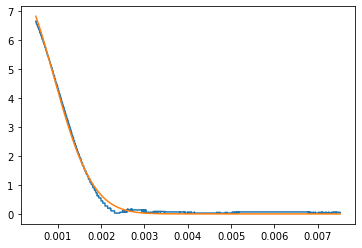

In [80]:
plt.plot(tlist, trans_mag)
plt.plot(tlist, [FID_fit(t,*popt) for t in tlist])

In [81]:
T2s_FID.append(popt[1])

In [48]:
def FID_fit(t, A, T2):
        return A*np.exp(-(t)**2/(2*T2**2))

ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

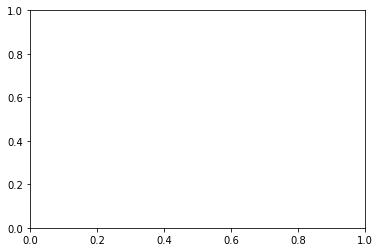

In [96]:
plt.plot(T2s, T2s_FID, marker = "x")